In [1]:
# !pip install --upgrade pip # just in case you need to install or upgrade pip
# !pip install statsmodels --upgrade # installing statsmodels if you don't have it already
import pandas as pd # we've seen pandas before
import statsmodels.api as sm # this is the modeling library that we will use

In [2]:
# be sure to have the csv file questselections18.csv in the same directory as this ipynb
df = pd.read_csv("~/Desktop/questselections18.csv")

In [3]:
# we begin with a simple examination of the first few rows of the dataframe
# notice that there are six columns, which I define here:
#
# id (Ordinal) - a unique identifier for each application received by QUEST in 2018
# note that applications that are received earlier have lower id scores
# some id's are missing because a student may have started an application but
# didn't submit it
#
# credits (Ratio) - an integer that is a count of the number of college credits an
# applicant has when they submit their application.  Note that the number of credits
# may be greater than zero even when a student applies in the fall semester because
# of AP or similar credits they bring to the University of Maryland
#
# gpa (Ratio) - what is the current college gpa of the applicant
#
# school (Nominal) - this can be "CMNS" or "Clark" or "Smith"
#
# score (Interval) - what is the average score of the quality of the application based on alumni
# and current student reviewers
#
# interview (Ordinal or Categorical?) - a binary variable that is '1' if the applicant is invited to come and interview
# and '0' if the applicant is not invited

df.head()

,id,credits,gpa,school,score,interview
0,1757,15,3.55,CMNS,3.5,1
1,1760,15,4.00,CMNS,4.0,1
2,1761,15,3.45,Clark,4.5,1
3,1762,18,3.40,Clark,4.5,1
4,1763,19,3.38,Smith,2.5,0


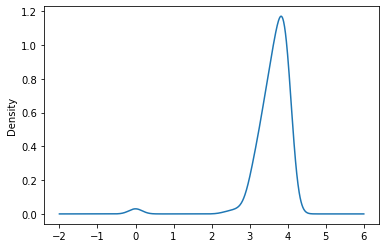

In [5]:
df['gpa'].plot.kde()

In [6]:
# you might recall that there are some GPAs reported as zero (3 of them)
# therefore, we want to drop the rows where this is the case
df=df[df['gpa'] != 0]

In [14]:
(df['gpa']).dtype

dtype('float64')

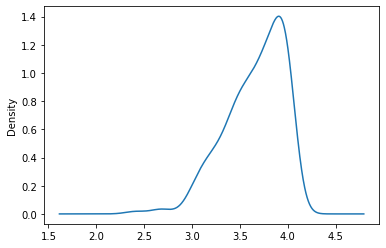

In [15]:
df['gpa'].plot.kde()

In [7]:
dummies = pd.get_dummies(df['school'], drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [8]:
df.head()

,id,credits,gpa,school,score,interview,Clark,Smith
0,1757,15,3.55,CMNS,3.5,1,0,0
1,1760,15,4.00,CMNS,4.0,1,0,0
2,1761,15,3.45,Clark,4.5,1,1,0
3,1762,18,3.40,Clark,4.5,1,1,0
4,1763,19,3.38,Smith,2.5,0,0,1


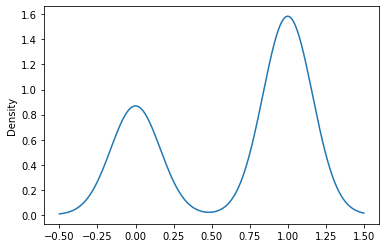

In [9]:
# if we look at the depenendent variable, we should
# see that it is bimodal
df["interview"].plot.kde()

In [10]:
df.describe()

,id,credits,gpa,score,interview,Clark,Smith
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,1978.551570,18.591928,3.655247,3.341555,0.645740,0.269058,0.417040
std,141.772517,8.696034,0.306804,0.863019,0.479365,0.444468,0.494179
min,1757.000000,0.000000,2.410000,0.000000,0.000000,0.000000,0.000000
25%,1864.500000,15.000000,3.465000,3.000000,0.000000,0.000000,0.000000
50%,1953.000000,16.000000,3.720000,3.500000,1.000000,0.000000,0.000000
75%,2086.500000,17.000000,3.920000,4.000000,1.000000,1.000000,1.000000
max,2277.000000,60.000000,4.000000,5.000000,1.000000,1.000000,1.000000


In [11]:
# let's take a look at the correlation matrix of independent variables
YVar = df[["interview"]] # this is our dependent variable
XVar = df[["score", "credits", "gpa", "Clark", "Smith"]] # these are our independent variables
XVar.corr()

,score,credits,gpa,Clark,Smith
score,1.000000,0.071874,0.138119,0.142954,-0.097852
credits,0.071874,1.000000,0.021185,0.063498,-0.066088
gpa,0.138119,0.021185,1.000000,0.015697,-0.032025
Clark,0.142954,0.063498,0.015697,1.000000,-0.513159
Smith,-0.097852,-0.066088,-0.032025,-0.513159,1.000000


In [12]:
# let's now do a logistic regression where we try to predict whether or not the applicant
# gets an interview
LogisticModel = sm.Logit(YVar, XVar).fit() # this is the logistic regression
print(LogisticModel.summary()) # this prints out the results of the model

Optimization terminated successfully.
         Current function value: 0.471757
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              interview   No. Observations:                  223
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.2743
Time:                        14:27:54   Log-Likelihood:                -105.20
converged:                       True   LL-Null:                       -144.96
Covariance Type:            nonrobust   LLR p-value:                 2.206e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
score          1.8954      0.286      6.633      0.000       1.335       2.455
credits        0.0017      0.

In [16]:
df['score_gpa']=df['score']*df['gpa']

In [22]:
YVar = df[["interview"]] # this is our dependent variable
XVar = df[["id", "score", "credits", "gpa", "Clark", "Smith", "score_gpa"]] # these are our independent variables
XVar.corr()

,id,score,credits,gpa,Clark,Smith,score_gpa
id,1.000000,-0.233167,0.039472,-0.228626,-0.121388,0.091343,-0.282676
score,-0.233167,1.000000,0.071874,0.138119,0.142954,-0.097852,0.954255
credits,0.039472,0.071874,1.000000,0.021185,0.063498,-0.066088,0.077248
gpa,-0.228626,0.138119,0.021185,1.000000,0.015697,-0.032025,0.419470
Clark,-0.121388,0.142954,0.063498,0.015697,1.000000,-0.513159,0.125463
Smith,0.091343,-0.097852,-0.066088,-0.032025,-0.513159,1.000000,-0.094237
score_gpa,-0.282676,0.954255,0.077248,0.419470,0.125463,-0.094237,1.000000


In [18]:
LogisticModel = sm.Logit(YVar, XVar).fit() # this is the logistic regression
print(LogisticModel.summary()) # this prints out the results of the model

Optimization terminated successfully.
         Current function value: 0.431743
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              interview   No. Observations:                  223
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                            5
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.3358
Time:                        14:36:03   Log-Likelihood:                -96.279
converged:                       True   LL-Null:                       -144.96
Covariance Type:            nonrobust   LLR p-value:                 1.900e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
score         -0.7329      0.665     -1.101      0.271      -2.037       0.571
credits        0.0179      0.

In [20]:
df['id'].skew()

0.29338348104039147

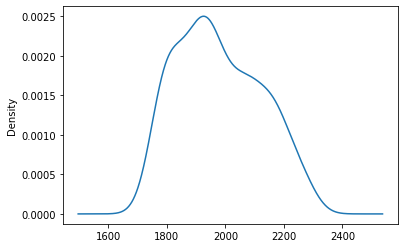

In [21]:
df['id'].plot.kde()